# Forbes Americas Top Colleges in 2019

##### Group Members: ***Ninong Liu, Ninan Liu, Yining Bai***

## Introduction

Every year, many people choose where to go to college is one of the most common problems. Compare several colleges and choose the college you think is suitable. Searching college rankings directly from the Internet is undoubtedly the easiest way.

In this tutorial, we will analyze the correlation between university rankings and various indicators. These indicators include annual cost, alumni salary, 
acceptance rate, SAT score, ACT score, etc. The main audience for our analysis of this data is to apply to students from 
different schools. This can more effectively help students choose a school that suits them. I hope you enjoy the tutorial!
(Information Sourced from: https://www.kaggle.com/chris95cam/forbes-americas-top-colleges-2019)

- We need to insert the packages in order to start this tutorial.

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import numpy as np
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from numpy.polynomial.polynomial import polyfit
import sklearn.model_selection as ms
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_predict
import sklearn.metrics as met
from sklearn.metrics import plot_confusion_matrix

## > Loading Data

- The goal of this tutorial is to learn how to analyze the data by using python. So we need to get the data first and then start to do the rest of the tasks. 
We will be using pandas to read in the CSV file(comma-separated values).

- By giving pandas the path to the data, the loan sequence number and we need pandas to parse the data.

In [240]:
df = pd.read_csv("ForbesAmericasTopColleges2019.csv")
df = df.rename(columns = {'Undergraduate Population': 'UndergraduatePopulation', 'Student Population': 'StudentPopulation',\
                    'Net Price': 'NetPrice', 'Average Grant Aid':'AverageGrantAid','Total Annual Cost':'TotalAnnualCost',\
                    'Alumni Salary':'AlumniSalary','Acceptance Rate':'AcceptanceRate','SAT Lower':'SATLower',\
                    'SAT Upper':'SATUpper','ACT Lower':'ACTLower','ACT Upper':'ACT_Upper'}, inplace = False)
df

,Rank,Name,City,State,Public/Private,UndergraduatePopulation,StudentPopulation,NetPrice,AverageGrantAid,TotalAnnualCost,AlumniSalary,AcceptanceRate,SATLower,SATUpper,ACTLower,ACT_Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,646.0,New Mexico State University,Las Cruces,NM,Public,13379.0,14432.0,8625.0,9582.0,34720.0,96700.0,64.0,910.0,1160.0,18.0,23.0,www.nmsu.edu
646,647.0,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012.0,9297.0,32938.0,85600.0,85.0,900.0,1110.0,17.0,23.0,www.indstate.edu
647,648.0,Emory &amp; Henry College,Emory,VA,Private,1094.0,1226.0,19340.0,27155.0,48100.0,70700.0,72.0,988.0,1170.0,19.0,25.0,www.ehc.edu
648,649.0,Wells College,Aurora,NY,Private,488.0,516.0,22828.0,30207.0,55180.0,NaN,80.0,NaN,NaN,NaN,NaN,www.wells.edu


***As we can see, Pandas has now loaded all our data into a dataframe. A dataframe is a 2-dimensional labeled data structure with columns of 
potentially different types. It displays as a table by using the columns and rows.***

## > Exploratory Data Analysis

- Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. EDA is important because it gives you more help when you are handling the data.

- We are trying to use different types of plots to display the relationship between the Alumni Salary and the Rank of the colleges. These graphs can show the alumni salary level of most of the different colleges and the distribution of some outliers. 
Even though they look different, the results are the same. When the Rank of the colleges goes down, the Alumni Salary decreases. This can give you a better understanding of different graphs.

- In the beginning, we choose to create an overall line plot to show the relationship between the Alumni Salary and the Rank of colleges.

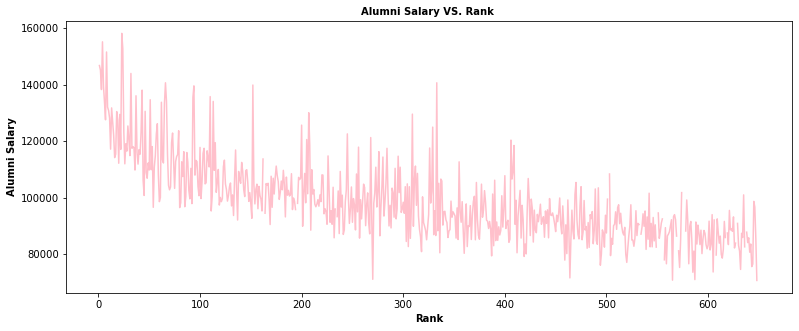

In [241]:
rank_list = df['Rank'].to_list()
salary_list = df['AlumniSalary'].to_list()
plt.figure(figsize = (13, 5))
plt.xlabel("Rank", size=10, weight='bold')
plt.ylabel("Alumni Salary", size=10, weight='bold')
plt.title("Alumni Salary VS. Rank ",size=10, weight='bold')
plt.plot(rank_list, salary_list, color = 'pink')
plt.show()

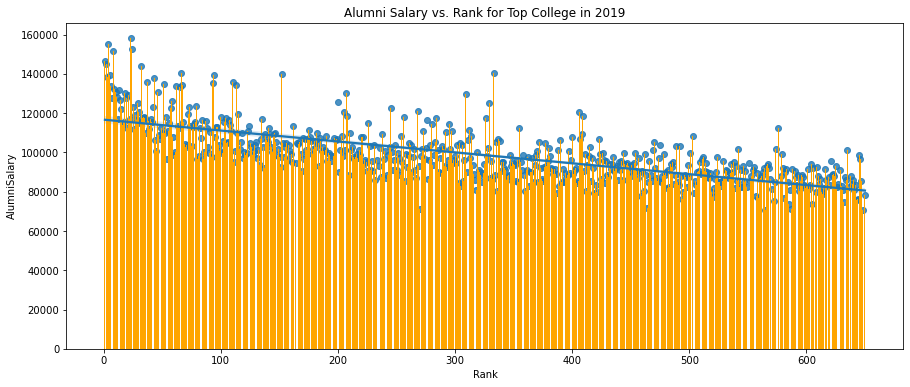

In [242]:
# Creating the bar plot
AlumniSalary = df['AlumniSalary']
Rank = df['Rank']

fig = plt.figure(figsize = (15, 6))
plt.title("Alumni Salary vs. Rank for Top College in 2019")
plt.xlabel("Rank")
plt.ylabel("Alumni Salary")
plt.bar(Rank, AlumniSalary, color ='orange')
sns.regplot(x = "Rank", y = "AlumniSalary", data = df)
plt.show()

***According to the plots above, the main trend shows a decreasing rate. As the value of rank increases, 
the Alumni Salary tends to be decreasing. Students from the top college have a higher salary. 
If we look closely, we can see that the salary fluctuations in the bottom 350 schools have been significantly reduced. 
Although there are some oscillations in the plot, but the central trend still tends to be decreasing.***

- In order to make the trend more visiable, we divided the rank into 5 parts, let's take a look of these plots to have a more straight sence
of the relationship beteen rank and alumni salary.

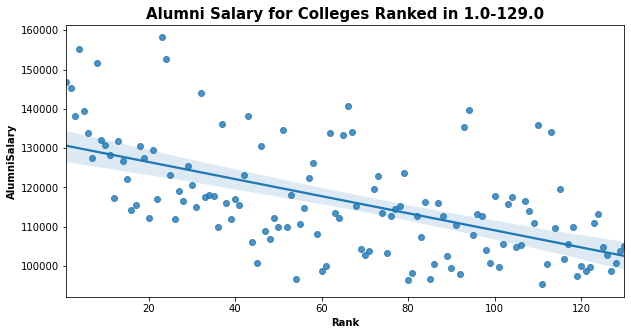

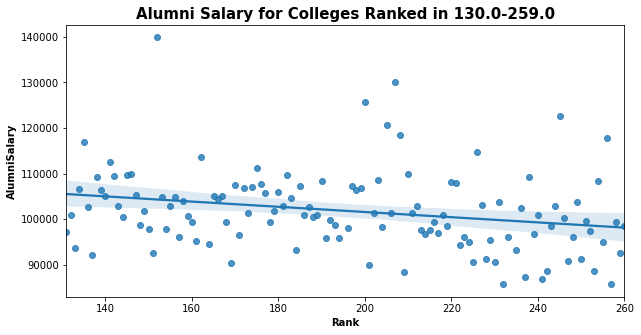

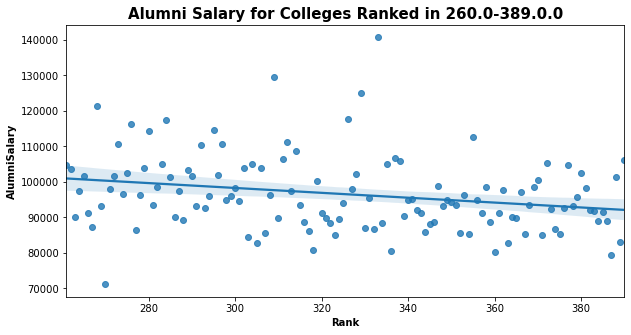

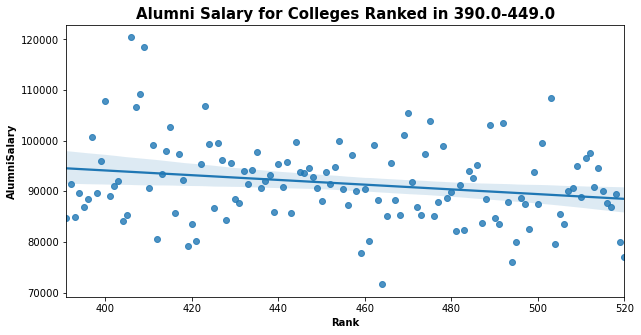

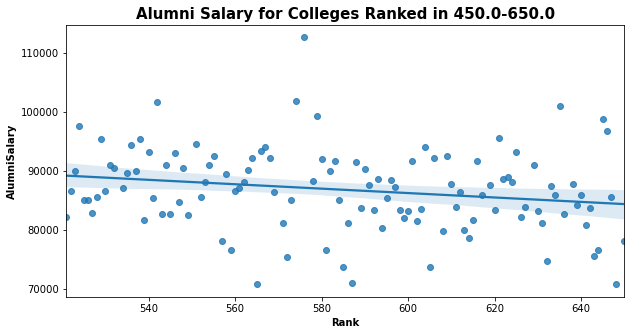

In [243]:
df['rankInterval'] = pd.cut(df['Rank'], bins = 5, labels = ['1.0-129.0', '130.0-259.0', '260.0-389.0.0', '390.0-449.0', '450.0-650.0'], right = False)
for rank, rank_group in df.groupby('rankInterval'):
    plt.figure(num = 3, figsize = (10, 5))
    plt.title("Alumni Salary for Colleges Ranked in " + rank, size=15, weight='bold')
    plt.xlabel("Mean of the Payroll (hundred million dollars)", size=10, weight='bold')
    plt.ylabel("Mean of the Winning Percentage (%)", size=10, weight='bold')
    
    sns.regplot(x="Rank", y="AlumniSalary", data=rank_group)
    plt.show()


***According to the plots, the data shows that the lower the rank of college, the lower the alumni salary. 
This kind plots with regression line show the same result as the previous plots. The overall trend is decreasing. 
The downward trend of the top 120 is more visiable. The scatter data of the top 120 colleges are scattered, 
but most of the colleges in the after 120 are near the regression line.***

## > Correlation and Hypothesis Testing

- By using the Spearman correlation matrix to indicate the correlation values between each variable included in the dataset. 
In the matrix below, the darker colors represent variables that are negatively correlated with each other. 
The orange/purple/red colors have less correlated variables. The light cream colors represent variables that are positively correlated. 
We will study different correlated variables later on.

***Hypothesis Test:***
    
Significance Level: **α=0.05**
    
***Ho*** =  There is no relationship between a variable and college rank

***Ha*** = There is a relationship between a variable and college rank

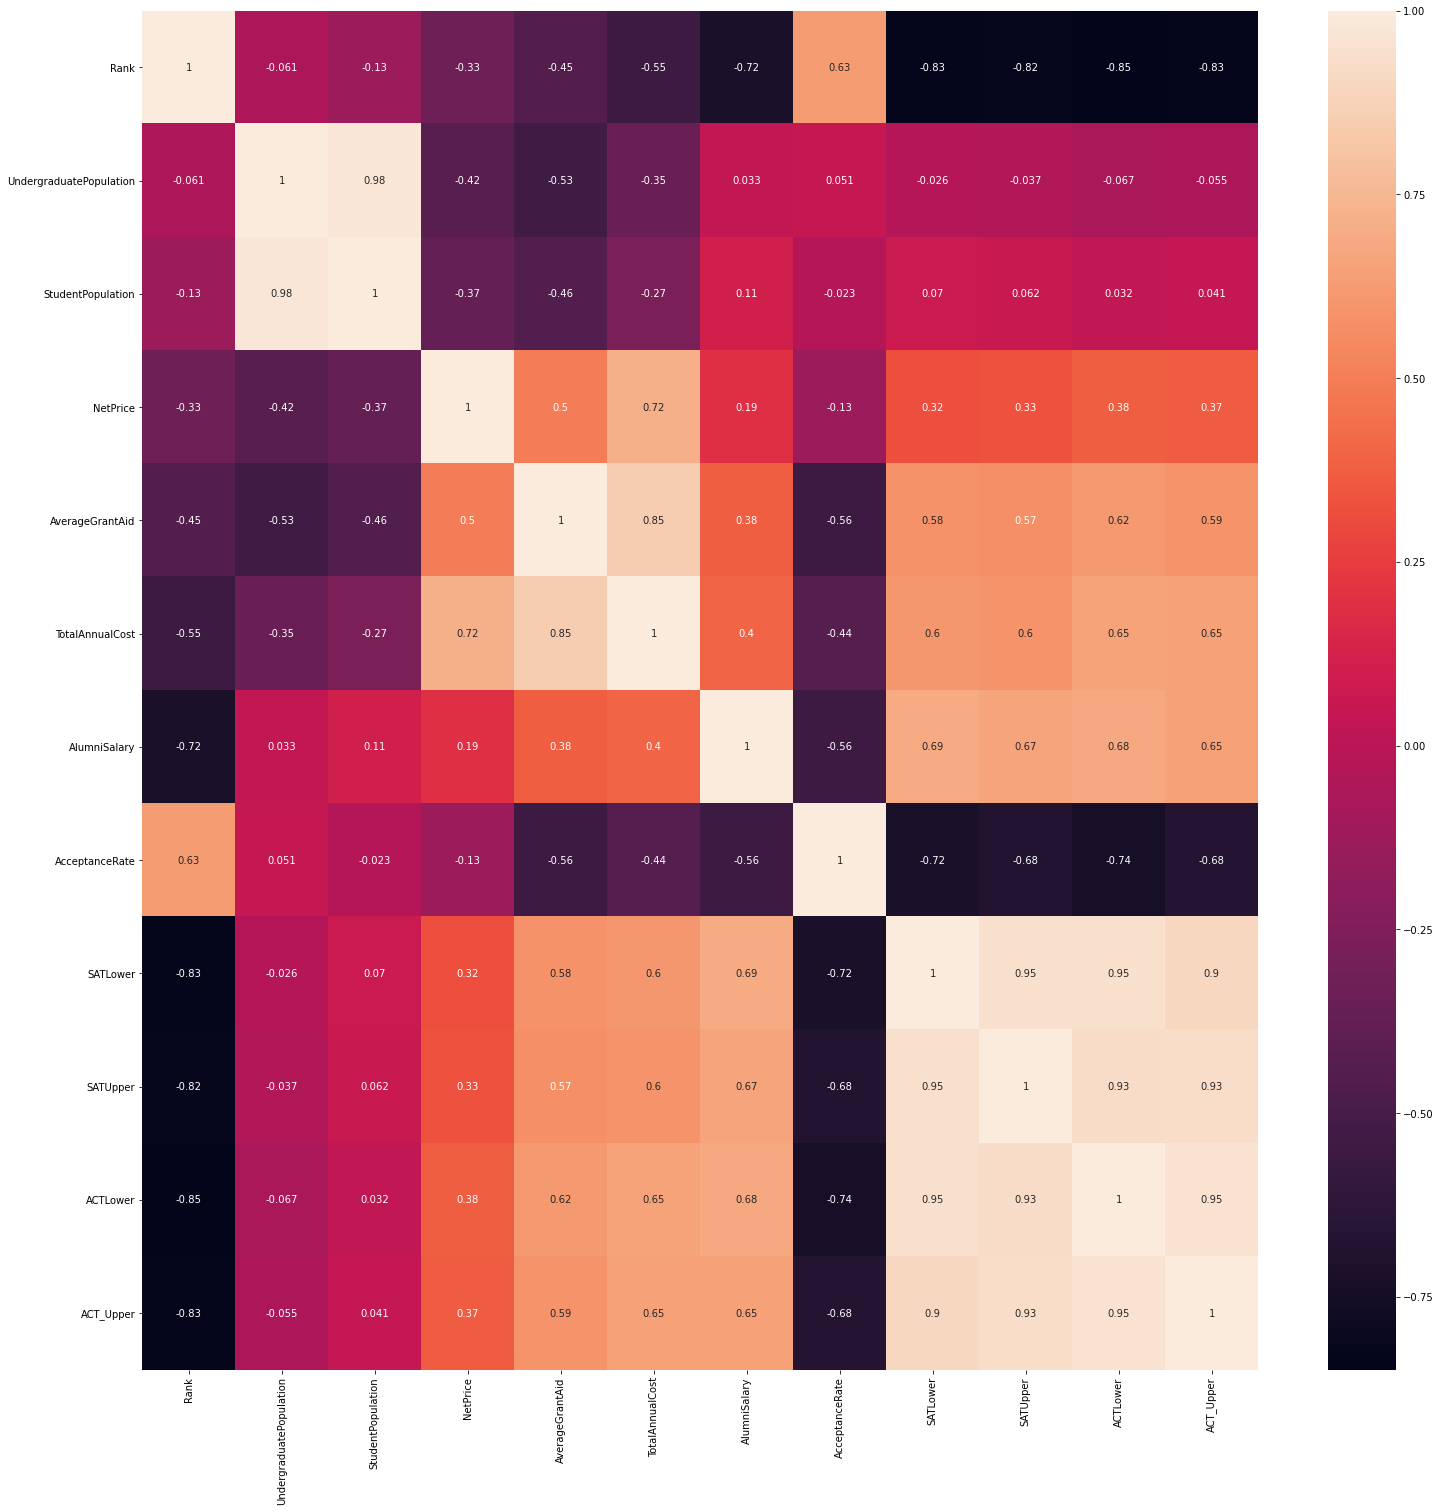

In [244]:
plt.gcf().set_size_inches((25, 25)) 
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

***The plot shows there is a negative correlation which means a relationship or inverse relationship between two variables 
if higher values of one variable tend to be associated with lower values of the other. When the value is greather than or equal to 0.7, 
we can say there is a strong correlation. -0.72 represents the high negative correlation which indicates that the lower alumni salary, 
the lower value of rank. However, the value of rank is low means the the rank of the college is higher.***

In [245]:
model1 = ols(formula = "Rank ~ AlumniSalary", data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     688.4
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          3.03e-103
Time:                        16:44:04   Log-Likelihood:                -3986.2
No. Observations:                 635   AIC:                             7976.
Df Residuals:                     633   BIC:                             7985.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1248.3940     35.707     34.962      0.000    1178.275    1318.513
AlumniSalary    -0.0094      0.000    -26.237      0.000      -0.010      -0.009
==============================================================================
Omnibus:                       27.394   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.334
Skew:                           0.177   Prob(JB):                     0.000772
Kurtosis:                       2.355   Cond. No.                     6.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***According to the above table, we can see that the p-value is 0, which is less than the signigicance level at 0.05, so we reject the null hypothesis.
Therefore, there is sufficient evidence to support that there is a relationship between Rank and AlumniSalary.
The R-square value in this model is 0.521, which is higher than 50%. We can say that this model is not bad for the provided dataset.***

In [246]:
model2 = ols(formula = "Rank ~ SATLower", data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1257.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          4.59e-144
Time:                        16:44:05   Log-Likelihood:                -3343.3
No. Observations:                 551   AIC:                             6691.
Df Residuals:                     549   BIC:                             6699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1695.5557     39.034     43.438      0.000    1618.881    1772.230
SATLower      -1.2384      0.035    -35.453      0.000      -1.307      -1.170
==============================================================================
Omnibus:                        2.311   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.391
Skew:                           0.148   Prob(JB):                        0.303
Kurtosis:                       2.871   Cond. No.                     9.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***According to the above table, we can see that the p-value is 0, which is less than the signigicance level at 0.05, so we reject the 
null hypothesis.
Therefore, there is sufficient evidence to support that there is a relationship between Rank and SAT score. 
The R-square value in this model is 0.696, which is closed to 70%. We can say that this model is a good fit to the provided dataset.***

In [247]:
model3 = ols(formula = "Rank ~ UndergraduatePopulation", data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.409
Date:                Wed, 21 Jul 2021   Prob (F-statistic):              0.121
Time:                        16:44:05   Log-Likelihood:                -4323.5
No. Observations:                 650   AIC:                             8651.
Df Residuals:                     648   BIC:                             8660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 335.7412      9.883     33.972      0.000     316.335     355.147
UndergraduatePopulation    -0.0010      0.001     -1.552      0.121      -0.002       0.000
==============================================================================
Omnibus:                      377.243   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.647
Skew:                          -0.001   Prob(JB):                     6.69e-09
Kurtosis:                       1.821   Cond. No.                     2.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***Based on the plot, we can see that the p-value for the intercept is 0, and for the slope is 0.121.
The p-value of slope is greather than the signigicance level at 0.05, so it's not resonable to use the regression equation. 
we do not reject null hypothesis.
Thus, there is insufficient evidence to support that there is a relationship between Rank and Undergraduate Population. 
The R-square value in this model is 0.004, which is very low. Therefore, if R-square tend to be lower, 
the model won't fit with my data.***

## > Tidy and Clean Data

- This part can help us to tidy our data set and split it into a train and test set for the machine learning portion of this tutorial.

- The clean_data module can help us to tidy our data set and split it into a train and test set for the machine learning portion of 
this tutorial. The rows with NaN values in the columns "AlumniSalary","SATLower","SATUpper","ACTLower","ACT_Upper" will be dropped first.
SAT lower score and upper score are the same type so than we can combine them to one column as the mean between them. The same procedure can 
be applied to the ACT score.

In [248]:
df.dropna(subset = ["AlumniSalary", "SATLower","SATUpper","ACTLower","ACT_Upper"], inplace=True)

# combine ASTLower and SATUpper column as the mean of them
df['SAT_mean'] = (df['SATLower'] + df['SATUpper'])/2
# combine ASTLower and SATUpper column as the mean of them
df['ACT_mean'] = (df['ACTLower'] + df['ACT_Upper'])/2
df.drop(df.loc[:, 'SATLower':'Website'].columns, axis = 1,  inplace = True)
df

,Rank,Name,City,State,Public/Private,UndergraduatePopulation,StudentPopulation,NetPrice,AverageGrantAid,TotalAnnualCost,AlumniSalary,AcceptanceRate,rankInterval,SAT_mean,ACT_mean
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1.0-129.0,1525.0,33.5
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1.0-129.0,1465.0,33.5
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1.0-129.0,1520.0,33.5
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1.0-129.0,1530.0,34.0
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1.0-129.0,1500.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,645.0,Morehouse College,Atlanta,GA,Private,2202.0,2219.0,34928.0,17318.0,48723.0,98700.0,74.0,450.0-650.0,1055.0,20.5
645,646.0,New Mexico State University,Las Cruces,NM,Public,13379.0,14432.0,8625.0,9582.0,34720.0,96700.0,64.0,450.0-650.0,1035.0,20.5
646,647.0,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012.0,9297.0,32938.0,85600.0,85.0,450.0-650.0,1005.0,20.0
647,648.0,Emory &amp; Henry College,Emory,VA,Private,1094.0,1226.0,19340.0,27155.0,48100.0,70700.0,72.0,450.0-650.0,1079.0,22.0


## > Machine Learning

- We choose Linear SVM Model to apply to this machine learning part. Based on the above analysis, we can roughly conclude that the central 
trend between alumni salary and college rank is negative proportion, and there is linear relationship between them. 
The better rank the college is at, the higher salary will the students
get. Therefore it's a good option to pick Linear SVM Model in the machine learning part to process an analysis in our dataset.

- The mlumni salary is classfied into three levels: 0, 1, 2, which is corresponding to the amount of salary. The training dataset is the 
rank of college, and predicted result is the salary classfication (0, 1, 2).

### Linear SVM Model

Classfication

In [249]:
# Classification
df['salary_class'] = 0.0
for i, row in df.iterrows():
    if float(row['AlumniSalary']) < 100000.0:
        df.at[i, 'salary_class'] = 0
    if float(row['AlumniSalary']) >= 100000.0 and row['AlumniSalary'] < 130000.0:
        df.at[i, 'salary_class'] = 1
    if float(row['AlumniSalary']) >= 130000.0:
        df.at[i, 'salary_class'] = 2
df

,Rank,Name,City,State,Public/Private,UndergraduatePopulation,StudentPopulation,NetPrice,AverageGrantAid,TotalAnnualCost,AlumniSalary,AcceptanceRate,rankInterval,SAT_mean,ACT_mean,salary_class
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1.0-129.0,1525.0,33.5,2.0
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1.0-129.0,1465.0,33.5,2.0
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1.0-129.0,1520.0,33.5,2.0
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1.0-129.0,1530.0,34.0,2.0
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1.0-129.0,1500.0,33.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,645.0,Morehouse College,Atlanta,GA,Private,2202.0,2219.0,34928.0,17318.0,48723.0,98700.0,74.0,450.0-650.0,1055.0,20.5,0.0
645,646.0,New Mexico State University,Las Cruces,NM,Public,13379.0,14432.0,8625.0,9582.0,34720.0,96700.0,64.0,450.0-650.0,1035.0,20.5,0.0
646,647.0,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012.0,9297.0,32938.0,85600.0,85.0,450.0-650.0,1005.0,20.0,0.0
647,648.0,Emory &amp; Henry College,Emory,VA,Private,1094.0,1226.0,19340.0,27155.0,48100.0,70700.0,72.0,450.0-650.0,1079.0,22.0,0.0


In [250]:
rank = df['Rank'].to_list()
salaryClass = df['salary_class'].to_list()
rank = np.array(rank)
ind_train, ind_test, dep_train, dep_test = ms.train_test_split(rank.reshape(-1,1), salaryClass, random_state=42)

svc = svm.SVC(kernel='linear')
svc.fit(ind_train, dep_train)

SVC(kernel='linear')

In [251]:
# calculate the accuray of the test after each training
def accuracy (predict, actualResult):
    number_correct = 0
    for i in range (len(predict)):
        if (predict[i] == actualResult[i]):
            number_correct += 1
    return number_correct / len(predict)

In [252]:
# get the predicted values 
predicted1 = svc.predict(ind_test)

# print the accuracy of each classfication by the confusion matrix in %
actual1 = np.array(dep_test)
predictions1 = np.array(predicted1)

matrix1 = met.confusion_matrix(actual1, predictions1)
matrix1 = matrix1 / matrix1.sum(axis=1)[:, np.newaxis]*100
print("Confusion Matrix of Predicted Results and Actual Results\n")
print("   0            1             2\n")
print(matrix1)
acc1 = accuracy(predictions1, actual1)
print("\nThe accuracy of Linear SVM Model is "+str(acc1*100) + "%")

Confusion Matrix of Predicted Results and Actual Results

   0            1             2

[[ 82.27848101  17.72151899   0.        ]
 [ 26.66666667  73.33333333   0.        ]
 [  0.         100.           0.        ]]

The accuracy of Linear SVM Model is 74.24242424242425%


***Analysis: From the above outputs, the accuracy of linear svm model is about 74.24%. The accuracy is higher than 70%, so we can say this 
model fits our dataset. There is a skew in the accuracy. From the confusion matrix, the accuracy of calssfication 2 is the lowest, which 
is 0. All of the actual result with 2 are all classfied to 1 in this model.***

## Conclusion:

- The college determines everyone's life in the future. Choosing a college carefully is undoubtedly one of the most important things in life. We have obtained some important findings by analyzing the relationship between ranking indicators. We believe that these findings are related to how colleges are ranked. 

- By observing the data, we find that different indicators have a direct correlation with rankings. Indicators are the basis of ranking, so we use these as our target characteristics. The salary is divided into three levels, and correspondingly, there are also rankings of colleges that meet the salary.  Through the application of machine learning to test whether the college rank variables we give predictions can give the corresponding salary. Using linear regression, we can accurately fit the data. This proves that based on our predicted salary, we can give the ranking of the corresponding level of the colleges. By analyzing the data, we are surprised that the lowest-ranked college has an alumni salary of nearly 70,000 US dollars.  For example, how much influence does the student population have on the ranking of universities? Do public schools and private schools affect university rankings? Our tutorial did not analyze these problems, but our analysis can solve these problems.

- I hope that seeing a data science pipeline from:
Data processing -> Exploratory -> Data Analysis -> Hypothesis Testing -> Machine Learning and analysis 
Given you some insight into how you can leverage data.

## Related Links: 

If you would like to explore more topics in this tutorial mentioned, please take a look for the following links: 
    
https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
    
https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
    
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html    